### IMPORT LIBRARIES

In [34]:
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt


### IMPORT DATASET

In [35]:
file_path = r'C:\Users\Nursing_Homes.csv'


df = pd.read_csv(file_path)


print(df.head(3))


C:\Users\nhuyv\AppData\Local\Temp\ipykernel_16984\2398308597.py:4: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


            X          Y  OBJECTID   ID                                 NAME  \
0 -149.788332  61.196432         1  241                        LAKEVIEW HOME   
1 -149.113634  61.596385         2  257  ALASKA VETERANS' AND PIONEERS' HOME   
2 -149.148490  61.601329         3  268            TRANQUILITY MANOR ESTATES   

                  ADDRESS       CITY STATE      ZIP           ZIP4  ...  \
0     2675 WESLEYAN DRIVE  ANCHORAGE    AK  99508.0  NOT AVAILABLE  ...   
1  250 E. FIREWEED AVENUE     PALMER    AK  99645.0  NOT AVAILABLE  ...   
2        1950 HEMMER ROAD     PALMER    AK  99645.0  NOT AVAILABLE  ...   

         WEBSITE TOT_RES TOT_STAFF  BEDS EXCESS_BED      OWNERSHIP  \
0  NOT AVAILABLE      11      -999    11       -999  NOT AVAILABLE   
1  NOT AVAILABLE      79      -999    79       -999  NOT AVAILABLE   
2  NOT AVAILABLE      17      -999    17       -999  NOT AVAILABLE   

      MEDICAIDID     MEDICAREID  STATE_LIC       SOURCETYPE  
0  NOT AVAILABLE  NOT AVAILABLE    

In [36]:
### Data type
df.dtypes

X             float64
Y             float64
OBJECTID        int64
ID              int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP           float64
ZIP4           object
TELEPHONE      object
TYPE           object
STATUS         object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
SOURCEDATE     object
VAL_METHOD     object
VAL_DATE       object
WEBSITE        object
TOT_RES         int64
TOT_STAFF       int64
BEDS            int64
EXCESS_BED      int64
OWNERSHIP      object
MEDICAIDID     object
MEDICAREID     object
STATE_LIC      object
SOURCETYPE     object
dtype: object

In [37]:
## Dataset size
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 53129
Number of columns: 35


In [38]:
### Null checking
null_rows = df[df.isnull().any(axis=1)]
num_null = df.isnull().any(axis=1).sum()

print(f"Number of null: {num_null}")
print(null_rows)

Number of null: 7170
               X          Y  OBJECTID     ID  \
45959 -81.094958  38.136272     45960  70000   
45960 -78.777848  39.510951     45961  70001   
45961 -81.533083  39.279995     45962  70002   
45962 -79.842017  38.881550     45963  70003   
45963 -80.165485  39.482574     45964  70004   
...          ...        ...       ...    ...   
53124 -92.922202  44.839081     53125  77165   
53125 -93.499157  44.785634     53126  77166   
53126 -93.384939  45.179539     53127  77167   
53127 -92.870671  44.715789     53128  77168   
53128 -93.318914  45.245906     53129  77169   

                                      NAME                    ADDRESS  \
45959                        ANSTED CENTER            96 TYREE STREET   
45960        COMPLETE CARE AT DAWNVIEW LLC              1 DIANE DRIVE   
45961       EAGLE POINTE HEALTHCARE CENTER           1600 27TH STREET   
45962  ELKINS REHABILITATION & CARE CENTER          2533 BEVERLY PIKE   
45963              FAIRMONT MEDICAL C

In [39]:
## Duplicate checking
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = df.duplicated().sum()

print(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

Empty DataFrame
Columns: [X, Y, OBJECTID, ID, NAME, ADDRESS, CITY, STATE, ZIP, ZIP4, TELEPHONE, TYPE, STATUS, POPULATION, COUNTY, COUNTYFIPS, COUNTRY, LATITUDE, LONGITUDE, NAICS_CODE, NAICS_DESC, SOURCE, SOURCEDATE, VAL_METHOD, VAL_DATE, WEBSITE, TOT_RES, TOT_STAFF, BEDS, EXCESS_BED, OWNERSHIP, MEDICAIDID, MEDICAREID, STATE_LIC, SOURCETYPE]
Index: []

[0 rows x 35 columns]
Number of duplicate rows: 0


In [40]:
## Count distinct Sourcetype

distinct_sourcetype_count = df['SOURCETYPE'].nunique()
distinct_sourcetype = df['SOURCETYPE'].unique()

print(f"Number of sourcetype: {distinct_sourcetype_count}")
print(f"Name of sourcetype: {distinct_sourcetype}")

Number of sourcetype: 88
Name of sourcetype: ['ASSISTED LIVING' 'ASSISTED LIVING FACILITY' 'NURSING HOME'
 'ASSISTED LIVING FACILITY (SPECIALTY CARE)' 'LONG TERM CARE'
 'RESIDENTIAL CARE FACILITY' 'ASSISTED LIVING FACILITY LEVEL I'
 'ASSISTED LIVING FACILITY LEVEL II' 'ASSISTED LIVING LEVEL II'
 'NOT AVAILABLE' 'POST-ACUTE HEAD INJURY RETRAINING RESIDENTIAL FACILITY'
 'ASSISTED LIVING II'
 'SKILLED NURSING FACILITY WITH DUAL CERTIFIED BEDS (MEDICAID/MEDICARE)'
 'SKILLED NURSING FACILITY ONLY'
 'SKILLED NURSING FACILITY/NURSING FACILITY DUAL CERTIFIED'
 'SKILLED NURSING FACILITY/NURSING FACILITY DISTINCT PARTITION'
 'RESIDENTIAL CARE ELDERLY' 'RCFE-CONTINUING CARE RETIREMENT COMMUNITY'
 'SKILLED NURSING FACILITY' 'NURSING HOME - MEDICARE/MEDICAID CERTIFIED'
 'ASSISTED LIVING RESIDENCE - PRIVATE PAY'
 'ASSISTED LIVING RESIDENCE - MEDICAID CERTIFIED'
 'RESIDENTIAL TREATMENT FACILITY - MENTALLY ILL'
 'ASSISTED LIVING RESIDENCE' 'NURSING HOME - MEDICARE CERTIFIED'
 'NURSING HOME - PRIVATE P

In [42]:
# Checking outlier in 'Population'
count_negative_999 = (df['POPULATION'] == -999).sum()
print(f"Number of outliers: {count_negative_999}")

# Checking outlier in 'Tot_staff'
count_negative_999 = (df['TOT_STAFF'] == -999).sum()
print(f"Number of ouliers: {count_negative_999}")

# Checking outlier in 'Tot_res'
count_negative_999 = (df['TOT_RES'] == -999).sum()
print(f"Number of outliers: {count_negative_999}")

# Checking outlier in 'Beds
count_negative_999 = (df['BEDS'] == -999).sum()
print(f"Number of outlier: {count_negative_999}")

# Checking outlier in 'Excess_bed'
count_negative_999 = (df['EXCESS_BED'] == -999).sum()
print(f"Number of outliers: {count_negative_999}")

# Checking NOT AVAILABLE in 'OWNERSHIP'
count_not_available = (df['OWNERSHIP'] == 'NOT AVAILABLE').sum()
print(f"Number of NOT AVAILABLE in 'OWNERSHIP': {count_not_available}")

Number of outliers: 12052
Number of ouliers: 53129
Number of outliers: 10995
Number of outlier: 4951
Number of outliers: 53129
Number of NOT AVAILABLE in 'OWNERSHIP': 34095


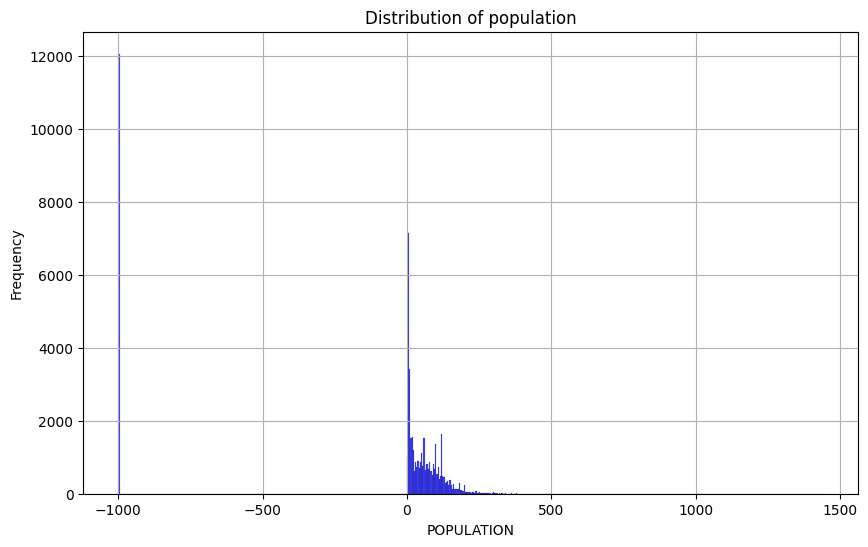

In [43]:
### Outlier define
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='POPULATION',color='b')
plt.title('Distribution of population')
plt.xlabel('POPULATION')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

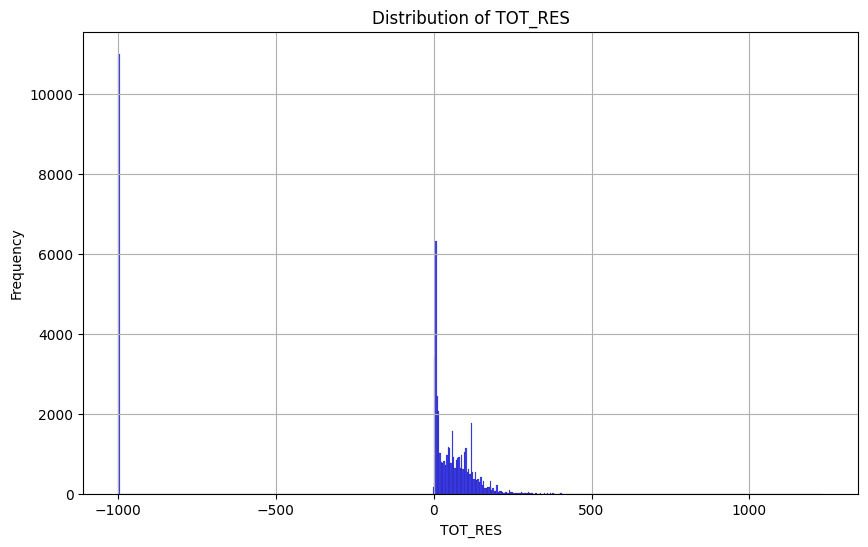

In [44]:
### Outlier define
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TOT_RES',color='b')
plt.title('Distribution of TOT_RES')
plt.xlabel('TOT_RES')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

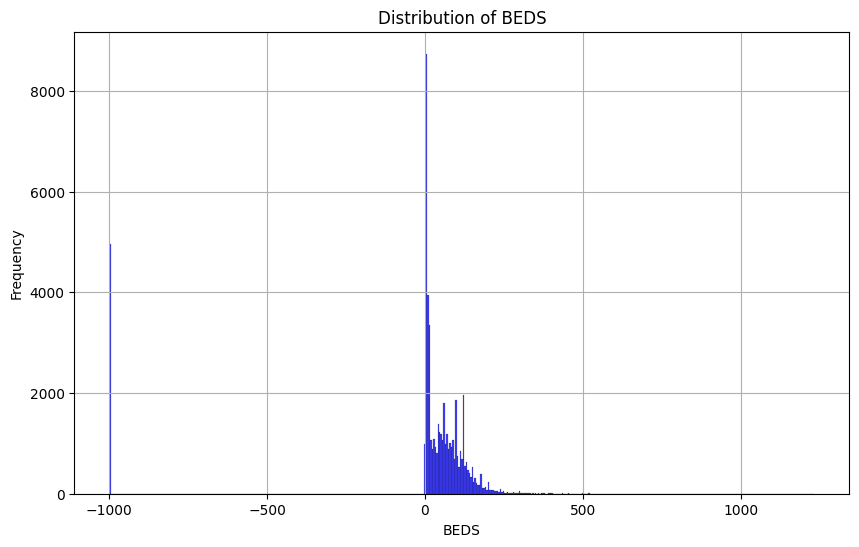

In [45]:
### Outlier define
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BEDS',color='b')
plt.title('Distribution of BEDS')
plt.xlabel('BEDS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### DATA CLEANING

In [46]:
# SOURCETYPE CLASSIFICATION
source_type_keywords = {
    "NURSING HOME": [
        "Skilled Nursing Facility", "SNF", "NF", "Nursing Facility",
        "Chronic and Convalescent Nursing Home", "Nursing", "Nursing home"
    ],
    "INTERMEDIATE CARE FACILITY": [
        "Intermediate Care Facility", "Intermediate Care"
    ],
    "MEMORY CARE/DEMENTIA/ALZHEIMER’S CARE": [
        "Dementia", "Alzheimer’s", "Memory Care", "Nursing Home - Dementia"
    ],
    "INDEPENDENT LIVING COMMUNITIES": [
        "Independent Living", "Community", "Residential"
    ],
    "ASSISTED LIVING FACILITIES": [
        "Assisted Living", "AL"
    ],
    "ASSISTED LIVING APARTMENTS": [
        "Apartment", "Living Facility", "Rest home", "ADULT CARE HOME"
    ],
    "LONG TERM CARE": [
        "LONG TERM CARE", "ICF/IID"
    ]
}


def classify_source_type(source_str):
    source_str = source_str.lower() 
    for category, keywords in source_type_keywords.items():
        for keyword in keywords:
            if keyword.lower() in source_str:
                return category
    return "OTHER"

df['CLASSIFIED_SOURCE_TYPE'] = df['SOURCETYPE'].apply(classify_source_type)

print(df)


                X          Y  OBJECTID     ID  \
0     -149.788332  61.196432         1    241   
1     -149.113634  61.596385         2    257   
2     -149.148490  61.601329         3    268   
3     -149.283983  61.611759         4    249   
4     -151.275259  60.510350         5    248   
...           ...        ...       ...    ...   
53124  -92.922202  44.839081     53125  77165   
53125  -93.499157  44.785634     53126  77166   
53126  -93.384939  45.179539     53127  77167   
53127  -92.870671  44.715789     53128  77168   
53128  -93.318914  45.245906     53129  77169   

                                      NAME                    ADDRESS  \
0                            LAKEVIEW HOME        2675 WESLEYAN DRIVE   
1      ALASKA VETERANS' AND PIONEERS' HOME     250 E. FIREWEED AVENUE   
2                TRANQUILITY MANOR ESTATES           1950 HEMMER ROAD   
3                         NORTHERN COMFORT       2800 N. LAGOON DRIVE   
4          NICHOLSON'S ASSISTED LIVING INC    

In [47]:
### Replace outlier
df[['POPULATION', 'TOT_RES', 'BEDS']] = df[['POPULATION', 'TOT_RES', 'BEDS']].replace(-999, 0)
print(df)

                X          Y  OBJECTID     ID  \
0     -149.788332  61.196432         1    241   
1     -149.113634  61.596385         2    257   
2     -149.148490  61.601329         3    268   
3     -149.283983  61.611759         4    249   
4     -151.275259  60.510350         5    248   
...           ...        ...       ...    ...   
53124  -92.922202  44.839081     53125  77165   
53125  -93.499157  44.785634     53126  77166   
53126  -93.384939  45.179539     53127  77167   
53127  -92.870671  44.715789     53128  77168   
53128  -93.318914  45.245906     53129  77169   

                                      NAME                    ADDRESS  \
0                            LAKEVIEW HOME        2675 WESLEYAN DRIVE   
1      ALASKA VETERANS' AND PIONEERS' HOME     250 E. FIREWEED AVENUE   
2                TRANQUILITY MANOR ESTATES           1950 HEMMER ROAD   
3                         NORTHERN COMFORT       2800 N. LAGOON DRIVE   
4          NICHOLSON'S ASSISTED LIVING INC    

In [48]:
### Drop useless column
columns_to_drop = ['X', 'Y', 'ID', 'ZIP', 'ZIP4', 'WEBSITE','ADDRESS', 'TOT_STAFF', 'EXCESS_BED', 'MEDICAIDID', 'MEDICAREID', 'STATE_LIC','SOURCE','SOURCEDATE','VAL_METHOD','VAL_DATE']
df = df.drop(columns=columns_to_drop)

\
print(df.head())


   OBJECTID                                 NAME       CITY STATE  \
0         1                        LAKEVIEW HOME  ANCHORAGE    AK   
1         2  ALASKA VETERANS' AND PIONEERS' HOME     PALMER    AK   
2         3            TRANQUILITY MANOR ESTATES     PALMER    AK   
3         4                     NORTHERN COMFORT    WASILLA    AK   
4         5      NICHOLSON'S ASSISTED LIVING INC      KENAI    AK   

        TELEPHONE             TYPE STATUS  POPULATION             COUNTY  \
0  (907) 333-8921  ASSISTED LIVING   OPEN          11          ANCHORAGE   
1  (907) 745-4241  ASSISTED LIVING   OPEN          79  MATANUSKA-SUSITNA   
2  (907) 746-4220  ASSISTED LIVING   OPEN          17  MATANUSKA-SUSITNA   
3  (907) 746-6493  ASSISTED LIVING   OPEN          16  MATANUSKA-SUSITNA   
4  (907) 283-6684  ASSISTED LIVING   OPEN          10    KENAI PENINSULA   

   COUNTYFIPS COUNTRY   LATITUDE   LONGITUDE  NAICS_CODE  \
0        2020     USA  61.196432 -149.788332      623312   
1       